Color thresholding - technique to filter out specific range of colors by defining upper and lower bounds. 
                    we can segment, replace, isolate specific colors 

# RGB 
Brightness effect of particular color - 
disadv - if I want to change the any one of color then it might affect all the colors, that affects targeting 
but in HSV, only the value (brightness) will change as it separates color from brightness (so HSV is used for color targeting )

# HSV 

Scaled version of HSV in OpenCV is H -> 0 to 179; S -> 0 to 255; V -> 0 to 255 

# Color Thresholding 

converting bg with diff color, original image is converted with mask 
so from RGB to HSV, because we to change only color 
to change to that particular color - we should have upper (121 degree) and lower bound (119 degree) (119,120,121) - target this green s, v - 100% 

so to target hue and create a mask ( 1 channel with bin values)
if the values in hue matrix is present between the selected range then 1 else 0, by checking and inserting these values in a matrix called "mask" is created

eg., to change color, where ever it is brown (1) replace with pink or else not (0), so black and white mask(an array of 1's, 0's ) is created - segmentation 

BGR -> HSV -> change the color -> RGB 

In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
image = cv2.imread("../images/test_img.jpg")

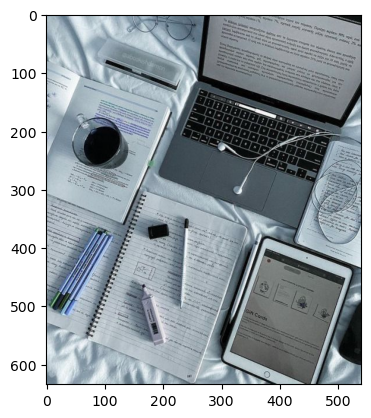

In [4]:
plt.imshow(image)

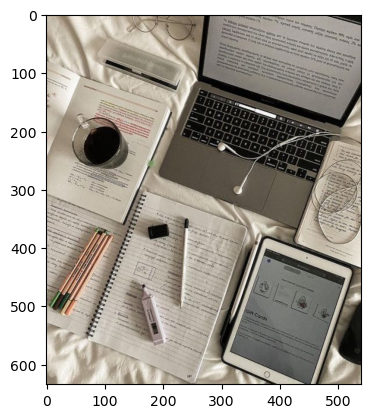

In [5]:
ct_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(ct_rgb)

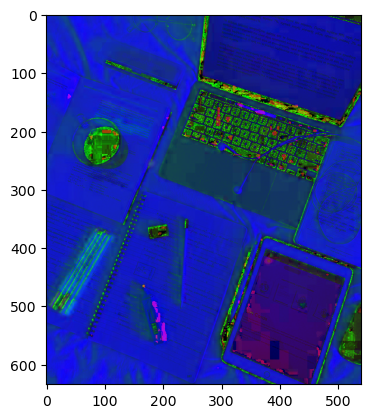

In [6]:
ct_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # converting to hsv
plt.imshow(ct_hsv)

## Create a mask 

### create a lower and upper bound to create a mask

In [7]:
# Lower Bound: Start at 0 for everything
lower_bound = np.array([0,0,0]) # hue(color), Saturation, Value(brightness)
# Upper Bound:
# Hue = 179 (Cover the entire color spectrum)
# Saturation = 255 (Cover all intensities, from grey to vivid)
# Value = 50 (Strictly limit brightness to keep it dark)
upper_bound = np.array([179,255,30])

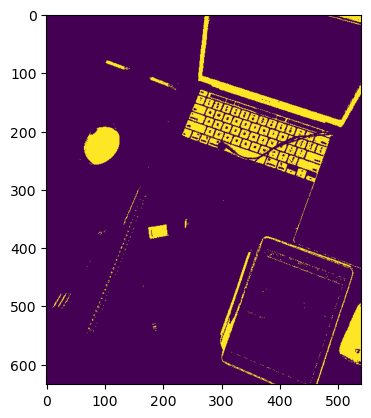

In [8]:
## targeting 
mask = cv2.inRange(ct_hsv, lower_bound, upper_bound)
plt.imshow(mask)

In [17]:
# burg_hsv = np.uint8([[[32,0,128]]])
# black_bgr = cv2.cvtColor(burg_hsv, cv2.COLOR_HSV2BGR)

burgundy_bgr = [32, 0, 128]

In [18]:
img_result = image.copy()
img_result[mask>0] = burgundy_bgr


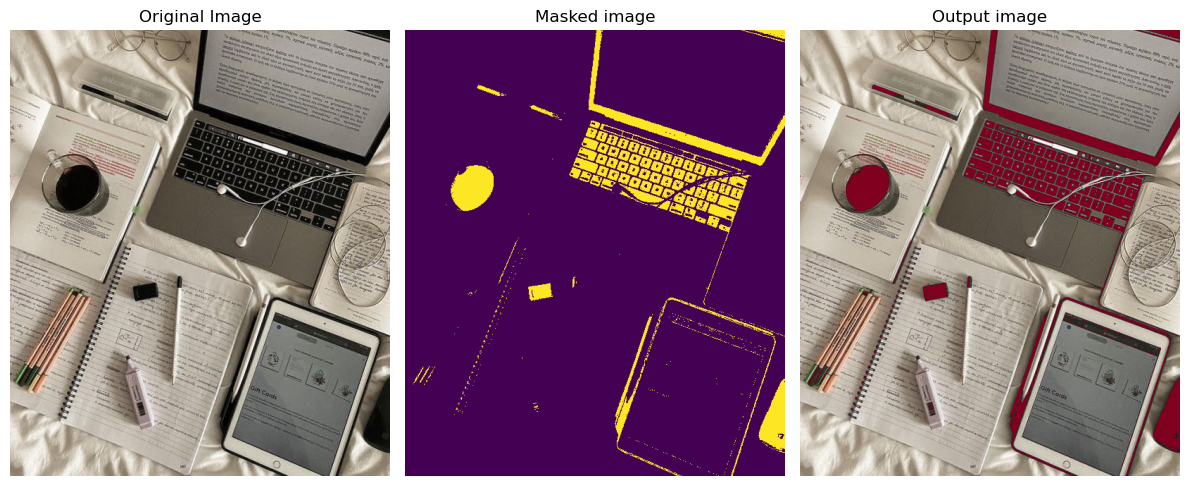

In [19]:
img_result_rgb = cv2.cvtColor(img_result,cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1, 3, figsize =(12,6))
axs[0].imshow(ct_rgb)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(mask)
axs[1].set_title("Masked image")
axs[1].axis('off')

axs[2].imshow(img_result_rgb)
axs[2].set_title("Output image")
axs[2].axis('off')

plt.tight_layout()
plt.show()

## Conculsion

Step 1: import packages, read the image
Step 2: convert the file from bgr to hsv
Step 3: assign the lower and upper bounds to the targeted value that need to be changed 
Step 4: use cv2.inRange() function to define the mask matrix
Step 5: define the color u want to change to 
Step 6: copy the original image apply the index mask with the new color 
Step 7: change the image to rgb and diaply it 